In [796]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# A activation function should have two properties

### * It should be a non linear function
### * It should be differentiable

# Now let see all the activation functions one by one 

## Activation : 1 - Step Function  

In [797]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

> The formula is: 
return " 0 if A<=0 else 1 "

In [798]:
step_function=np.where(Z<=0,0,1)

> Visualizing the function

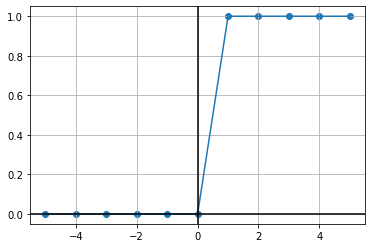

In [799]:
plt.scatter(Z,step_function)
plt.plot(Z,step_function)
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

###### As we can see this step function is  a linear function   ):
###### And it is not differentiable     ):
###### also it is not a smooth function
### So we can not use this step function in Neural Network

# Activation: 2 - Sigmoid

In [801]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

### The formula is 1/(1+e^-Z)

In [802]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [803]:
result_sigmoid =sigmoid(Z)

### Let's Visulaize the sigmoid function

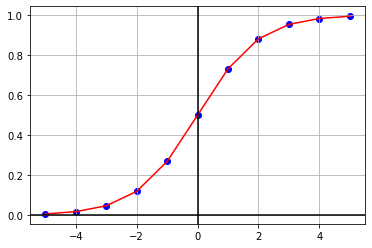

In [804]:
plt.scatter(Z,result_sigmoid,c="b")
plt.plot(Z,result_sigmoid,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

### Now lets visualize the derivative of Sigmoid

In [805]:
from IPython.display import Image

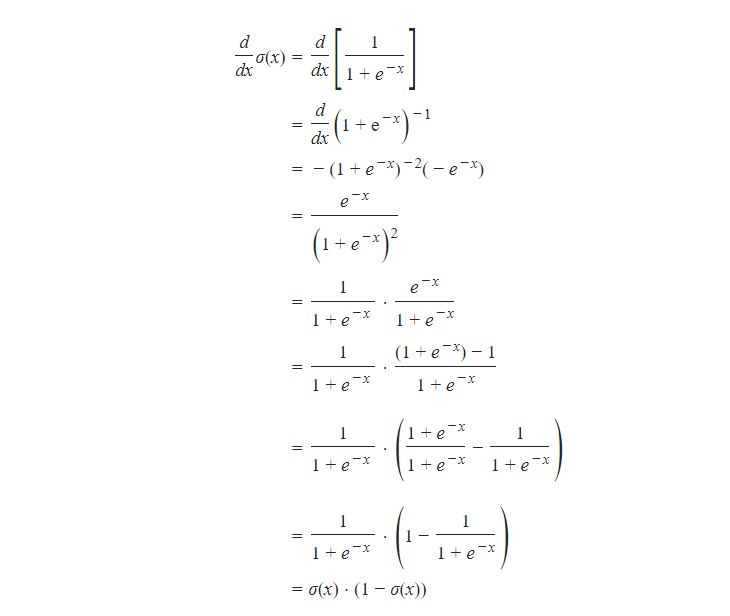

In [806]:

Image(r'C:\Users\Vishnu\Desktop\all Files\Study Plan\ml images\derivative of sigmoid.JPG')

#### Derivative_Sigmoid= sigmoid(Z) * (1-sigmoid(Z)

In [807]:
def derivative_sigmoid (Z):
    return Z *(1-Z)

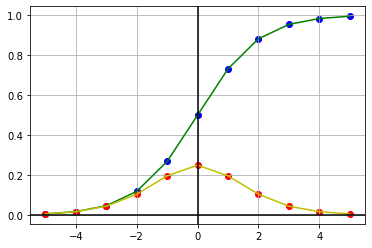

In [808]:
plt.scatter(Z,result_sigmoid,c="b")
plt.plot(Z,result_sigmoid,c="g")
plt.scatter(Z,derivative_sigmoid(result_sigmoid),c="r")
plt.plot(Z,derivative_sigmoid(result_sigmoid),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(0,0.26)

###### The Green Curve is the result of sigmoid function 
###### The Yello Curve is the gradient of sigmoid function
### Points to Note
   >1. Now the curve is smooth , As well as it is differentiable
   >2. Also notice that  all the values are mapped to some numbers between 0 and 1
   >3. Most importan one is the derivative. it always ranges between 0 to 0.25 (This is the disadvantage of Sigmoid)
### But the problem with this sigmoid function  is , the derivative of sigmid will be aproximatly 0 when Z value becoms too big or too small so it will cause the Vanishing gradient problem

# Activation 3- tanh

### The formula is f(Z) = (e^z - e^-z)/(e^z+e^-z)

In [608]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [809]:
def tanh(Z):
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

In [810]:
result_tanh=tanh(Z)

### Let's Visualize the tanh function

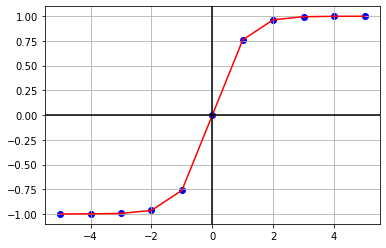

In [811]:
plt.scatter(Z,result_tanh,c="b")
plt.plot(Z,result_tanh,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

### Let's visualize the derivative of tanh

### Derivative of tanh - f'(Z) = 1- tanh^2

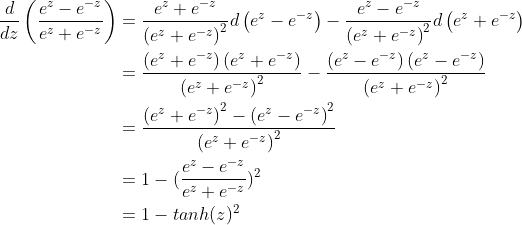

In [812]:
print()
Image(r'C:\Users\Vishnu\Desktop\all Files\Study Plan\ml images\derivative of tanh.gif')


In [813]:
def derivative_tanh(Z):
    return 1-Z**2

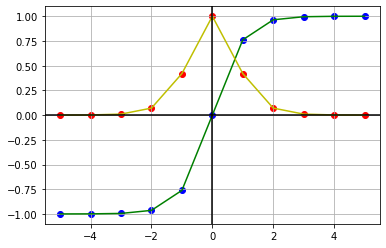

In [814]:
plt.scatter(Z,result_tanh,c="b")
plt.plot(Z,result_tanh,c="g")
plt.scatter(Z,derivative_tanh(result_tanh),c="r")
plt.plot(Z,derivative_tanh(result_tanh),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

##### The Green Curve is the result of sigmoid function 
##### The Yello Curve is the gradient of sigmoid function

### Points to Note
   >1. For tanh also the curve is smooth , As well as it is differentiable
   >2. Also notice that  all the values are mapped to some numbers between -1 and 1
   >3. And the derivative of thanh always ranges between 0 to 0.1 (This is the disadvantage of tanh)
### Here also we are facing the same proble which is the derivative of tanh will be aproximatly 0 when Z value becoms too big or too small so it will cause the Vanishing gradient problem

# Activation 4 - ReLU (Rectified Linear Unit)

1.The ReLU activation function helps us to overcome the problem of vanishing gradient
## The formula is:
>>f(Z) = max(0,Z)

In [815]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [816]:
def ReLU(Z):
    return np.maximum(0,Z)

In [817]:
result_ReLU = ReLU(Z)

### Let's Visualize the ReLU function

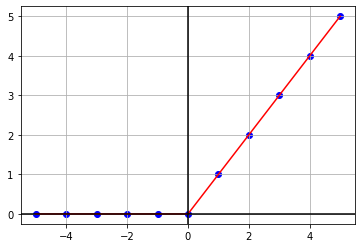

In [818]:
plt.scatter(Z,result_ReLU,c="b")
plt.plot(Z,result_ReLU,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

### Let's Visualize the derivative of ReLU
> Derivative of ReLU is { 1 when Z>0 
                        >, 0 when Z<=0  }    

In [819]:
def derivative_Relu(Z):
    return  np.where(Z>0,1,0)

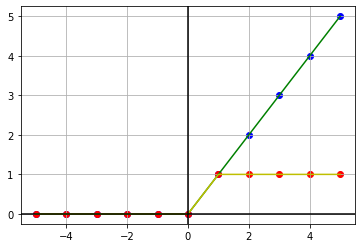

In [820]:
plt.scatter(Z,result_ReLU,c="b")
plt.plot(Z,result_ReLU,c="g")
plt.scatter(Z,derivative_Relu(Z),c="r")
plt.plot(Z,derivative_Relu(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.2,0.2)

##### The Green Curve is the result of sigmoid function 
##### The Yello Curve is the gradient of sigmoid function

### Points to Note
    > 1. Now for the postive side derivative will be one, so the weight updation happens smoothly
    > 2. But for the negative side derivative will be 0, so weight updation will not happen because of all these those neurons will be dead.
    > So here we are facing new probem which is Dead Neuron
### To solve this problem there is a activation function which is also a varient of ReLU called Leaky ReLU

# Activation 5 - Leaky Relu

In [821]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

### The formula is :
>>f(Z) = { return Z when Z>0 and return 0.01*Z when Z<=0 }

In [822]:
def Leaky_ReLU(Z):
    return np.where(Z>0,Z,0.01*Z)

In [823]:
result_Leaky_ReLU = Leaky_ReLU(Z)

### Let's visualize Leaky_ReLU function

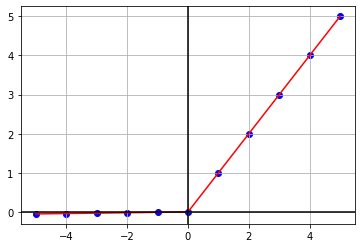

In [826]:
plt.scatter(Z,result_Leaky_ReLU,c="b")
plt.plot(Z,result_Leaky_ReLU,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.09,1)

### Let's visualize the derivatve of Leaky_ReLU
> The derivative is { 1 when Z>0 else 0.01 }

In [827]:
def derivative_LReLU(Z):
    return np.where(Z>0,1,0.01)


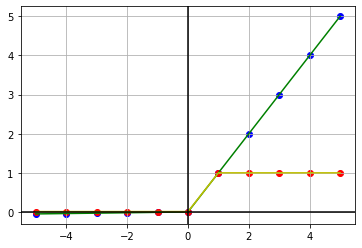

In [828]:
plt.scatter(Z,result_Leaky_ReLU,c="b")
plt.plot(Z,result_Leaky_ReLU,c="g")
plt.scatter(Z,derivative_LReLU(Z),c="r")
plt.plot(Z,derivative_LReLU(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.2,0.3)

## Points to Note:
> 1. Now for the negative portion the derivative will not be zero so we will not face the Dead Neuron problem
> 2. But again we will face the Vanishing gradient problem because for the negative portion the derivative will be 0.01.
## To solve this problem we have one more ReLU which is ELU-Exponentional linear unit

# Activation 6: ELU - Exponentional Linear Unit

### The formula is:
>>f(Z) = { Z when Z>0 else 0.01*(e^Z-1)}

In [829]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [830]:
def ELU(Z):
    return np.where(Z>0,Z,(0.01*(np.exp(Z)-1)))

In [831]:
result_ELU = ELU(Z)

### Let's visualize ELU function

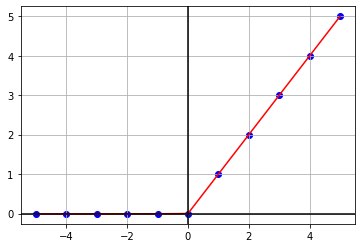

In [833]:
plt.scatter(Z,result_ELU,c="b")
plt.plot(Z,result_ELU,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.2,0)

### Let's visualize the derivative of ELU function
> derivative is { 1 when z>0 else 0.01*(e^Z)}

In [835]:
def derivative_ELU(Z):
    return np.where(Z>0,1,(0.1*(np.exp(Z))))

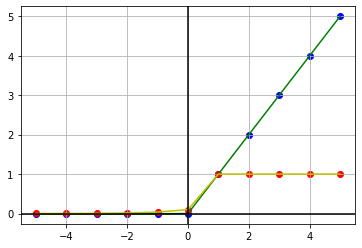

In [836]:
plt.scatter(Z,result_ELU,c="b")
plt.plot(Z,result_ELU,c="g")
plt.scatter(Z,derivative_ELU(Z),c="r")
plt.plot(Z,derivative_ELU(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.2,1)

## Points To Note
> 1. Here almost we have solved the vanishing gradient problem but still there are some chances for it(Because of the negative portion)
> 2. let see another varient of ReLU called Parametric ReLU

# Activation 7: Parametric ReLU

### The formula is :
>> f(Z) = { Z when Z>0 ,else alpha*Z} here alpha is a learning parameter

In [837]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [838]:
alpha=0.5

In [839]:
def PReLU(Z,alpha):
    return np.where(Z>0,Z,alpha*(Z))

In [840]:
result_PReLU=PReLU(Z,alpha)

### Let's visualize PReLU Function

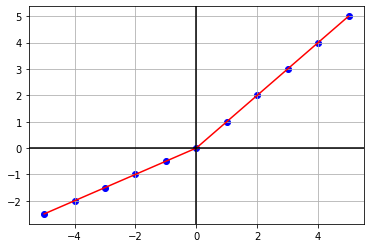

In [841]:
plt.scatter(Z,result_PReLU,c="b")
plt.plot(Z,result_PReLU,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

> It looks like Leaky ReLU Right? Now let's chane the alpha values

In [842]:
alpha=0.3

In [843]:
result_PReLU1=PReLU(Z,alpha)

## Let's visualize PReLU for alpha -10

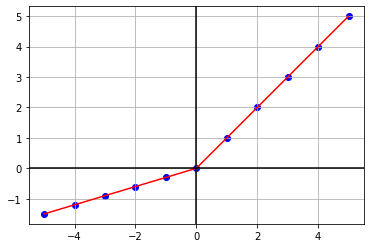

In [844]:
plt.scatter(Z,result_PReLU1,c="b")
plt.plot(Z,result_PReLU1,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

## Let's Visualize Derivative of PReLU

In [845]:
def derivative_LReLU(Z):
    return np.where(Z>0,1,alpha)

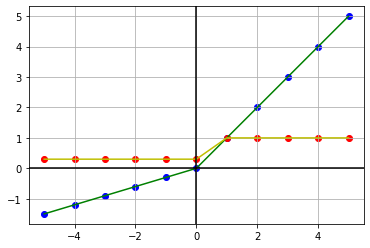

In [846]:
plt.scatter(Z,result_PReLU1,c="b")
plt.plot(Z,result_PReLU1,c="g")
plt.scatter(Z,derivative_LReLU(Z),c="r")
plt.plot(Z,derivative_LReLU(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

>1. Here alpha is a learning parameter so the derivative will change layer to layer. by doing this we can avoid vanishing gradient problem

# Activation 8: Softplus

### The formula is :
>f(Z)= ln(1+e^z)

In [847]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [848]:
def softplus(Z):
    return np.log(1+np.exp(Z))

In [849]:
result_sofplus = softplus(Z)

### Let's visualize the softplu function

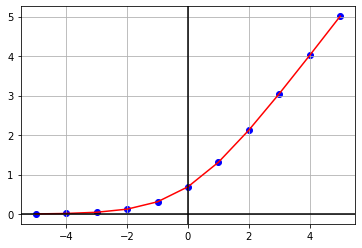

In [850]:
plt.scatter(Z,result_sofplus,c="b")
plt.plot(Z,result_sofplus,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.02,0.05)

### Let's visualize the Gradient of softplus
#### Gradient of soft plus is:
> f'(Z) = e^Z/1+e^Z

In [851]:
def derivative_softplus(Z):
    return np.exp(Z)/(1+np.exp(Z))

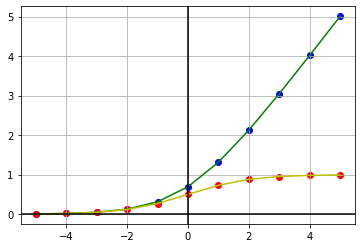

In [852]:
plt.scatter(Z,result_sofplus,c="b")
plt.plot(Z,result_sofplus,c="g")
plt.scatter(Z,derivative_softplus(Z),c="r")
plt.plot(Z,derivative_softplus(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')

# Activation 9: Swish - (Self-Gated) Function
### The formula is :
> f(Z) = Z*sigmoid(Z)

In [854]:
Z=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [855]:
def swish(Z):
    return Z*(1/(1+np.exp(-Z)))

In [856]:
result_swish = swish(Z)

### Let's visualize the swish function

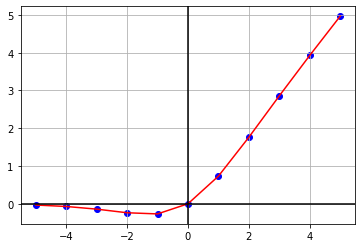

In [857]:
plt.scatter(Z,result_swish,c="b")
plt.plot(Z,result_swish,c="r")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.5,0.1)

### Let's visualize the derivative of swish function
> The derivative id f'(Z) = Z* (Sigma(Z)*(1-Sigma(Z))+Sigma(Z)

In [858]:
def derivative_Swish(Z):
    return  Z*(sigmoid(Z)*(1-sigmoid(Z)))+sigmoid(Z)

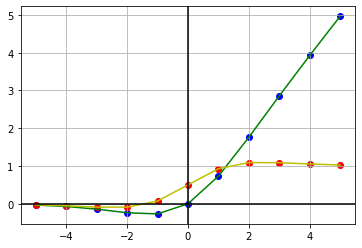

In [860]:
plt.scatter(Z,result_swish,c="b")
plt.plot(Z,result_swish,c="g")
plt.scatter(Z,derivative_Swish(Z),c="r")
plt.plot(Z,derivative_Swish(Z),c="y")
plt.grid()
plt.axvline(0,c='k')
plt.axhline(0,c='k')
# plt.ylim(-0.25,0.25)

# Activation 10: Maxout
### The formula is:
> f(z) = max(z1,z2,z3,z4,,,zn)

In [861]:
def Maxout(Z):
    for i in range(Z.shape[0]):
        ind=np.argmax(Z[i])
        row=Z[i,ind]
        Z[i]=np.where(Z[i]!=row,0,row)
    return Z

In [862]:
def derivative_Maxout(Z):
    for i in range(Z.shape[0]):
        ind=np.argmax(Z[i])
        row=Z[i,ind]
        Z[i]=np.where(Z[i]!=row,0,1)
    return Z